In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df = df.rename(columns={'average_soil_temperature': 'average_air_temperature'})

In [4]:
df.to_csv('final_data.csv',index=False)

In [5]:
df.head(1)

,Unnamed: 0,site,tree,plot,species,Date,longitude,latitude,da,mo,...,yr,average_stem_radius,change_stem_radius,average_basal_area,change_basal_area,average_air_temperature,average_air_pressure,average_humidity,avg_solar_irradiance,avg_soil_water_content
0,1,AK,1A,1,P glauca,2019-01-01,-149.71571,68.018576,1,1,...,2019,10.471403,0.002,344.476504,0.131595,-4.218056,89.953835,0.840035,0.0,0.077694


In [6]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0 site tree  plot   species        Date  longitude   latitude  \
0               1   AK   1A     1  P glauca  2019-01-01 -149.71571  68.018576   
1               2   AK   1A     1  P glauca  2019-02-01 -149.71571  68.018576   
2               3   AK   1A     1  P glauca  2019-03-01 -149.71571  68.018576   
3               4   AK   1A     1  P glauca  2019-05-01 -149.71571  68.018576   
4               5   AK   1A     1  P glauca  2019-06-01 -149.71571  68.018576   
...           ...  ...  ...   ...       ...         ...        ...        ...   
20430       26127   AK   6F     6  P glauca  2018-07-31 -149.76103  67.972423   
20431       26128   AK   6F     6  P glauca  2019-07-31 -149.76103  67.972423   
20432       26129   AK   6F     6  P glauca  2017-08-31 -149.76103  67.972423   
20433       26130   AK   6F     6  P glauca  2018-08-31 -149.76103  67.972423   
20434       26131   AK   6F     6  P glauca  2017-12-31 -149.76103  67.9724

In [7]:
df['freeze_flag'] = (df['average_air_temperature'] < 0).astype(int)

In [8]:
df.head()

,Unnamed: 0,site,tree,plot,species,Date,longitude,latitude,da,mo,...,average_stem_radius,change_stem_radius,average_basal_area,change_basal_area,average_air_temperature,average_air_pressure,average_humidity,avg_solar_irradiance,avg_soil_water_content,freeze_flag
0,1,AK,1A,1,P glauca,2019-01-01,-149.71571,68.018576,1,1,...,10.471403,0.002,344.476504,0.131595,-4.218056,89.953835,0.840035,0.000000,0.077694,1
1,2,AK,1A,1,P glauca,2019-02-01,-149.71571,68.018576,1,2,...,10.457236,0.001,343.545055,0.065706,-5.662500,93.803372,0.763849,3.239314,0.073754,1
2,3,AK,1A,1,P glauca,2019-03-01,-149.71571,68.018576,1,3,...,10.463347,0.001,343.946701,0.065744,-4.797222,93.997761,0.527651,NaN,0.074172,1
3,4,AK,1A,1,P glauca,2019-05-01,-149.71571,68.018576,1,5,...,10.464564,0.005,344.026717,0.328752,0.015385,93.797640,0.562969,130.753343,0.098590,0
4,5,AK,1A,1,P glauca,2019-06-01,-149.71571,68.018576,1,6,...,10.543083,0.002,349.208780,0.132487,5.043056,92.596726,0.415431,180.253983,0.289046,0


In [9]:
df['air_pressure_cat'] = pd.qcut(df['average_air_pressure'], 3,
                                 labels=['low','medium','high'])

In [10]:
df['humidity_cat'] = pd.cut(df['average_humidity'],
                            bins=[0,30,60,100],
                            labels=['dry','comfortable','humid'])

In [11]:
df['solar_rank'] = df['avg_solar_irradiance'].rank(method='first')
df['solar_cat'] = pd.qcut(df['solar_rank'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [12]:
df['soil_moist_cat'] = pd.qcut(df['avg_soil_water_content'], 3,
                               labels=['dry','moderate','wet'])

In [13]:
df.sort_values('change_basal_area')

,Unnamed: 0,site,tree,plot,species,Date,longitude,latitude,da,mo,...,average_air_pressure,average_humidity,avg_solar_irradiance,avg_soil_water_content,freeze_flag,air_pressure_cat,humidity_cat,solar_rank,solar_cat,soil_moist_cat
13817,15697,AK,3A,3,P glauca,2018-05-18,-149.75301,67.995233,18,5,...,93.899446,0.521141,66.235860,0.153552,1,medium,dry,9961.0,Q3,moderate
17337,21664,AK,5A,5,P glauca,2018-03-10,-149.76145,67.984763,10,3,...,92.427781,0.709797,NaN,NaN,1,low,dry,NaN,NaN,NaN
18062,22668,AK,5C,5,P glauca,2019-02-18,-149.76131,67.984964,18,2,...,93.416219,0.926086,6.535848,0.067764,1,low,dry,2749.0,Q1,dry
18116,22754,AK,5C,5,P glauca,2019-01-22,-149.76131,67.984964,22,1,...,95.223740,0.731364,0.000000,0.064201,1,medium,dry,1241.0,Q1,dry
18115,22753,AK,5C,5,P glauca,2018-12-21,-149.76131,67.984964,21,12,...,94.182381,0.854508,NaN,0.060694,1,medium,dry,NaN,NaN,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,11544,NWT,303,3,P glauca,2017-11-06,-133.77239,68.532348,6,11,...,101.711951,0.978080,1.004537,0.120552,1,high,dry,1815.0,Q1,moderate
9916,11623,NWT,303,3,P glauca,2017-10-15,-133.77239,68.532348,15,10,...,99.739758,0.948694,7.451375,0.307497,1,medium,dry,2836.0,Q1,moderate
15793,19318,AK,4B,4,P glauca,2019-04-08,-149.75408,67.994611,8,4,...,91.765022,0.645788,NaN,0.108320,1,low,dry,NaN,NaN,dry
17431,21794,AK,5A,5,P glauca,2018-01-17,-149.76145,67.984763,17,1,...,91.693984,0.887073,NaN,NaN,1,low,dry,NaN,NaN,NaN


In [14]:
print(df['change_basal_area'].sort_values(ascending=False).head(10))

# See how many trees have "extreme" growth (e.g., > 10)
extreme_count = df[df['change_basal_area'] > 10].shape[0]
print(f"Number of trees with growth > 10: {extreme_count}")

17450    3.903743
17431    2.887956
15793    2.369751
9916     2.310371
9837     2.237438
17536    2.189263
17368    2.108445
16059    2.103607
15949    2.071728
9848     2.043100
Name: change_basal_area, dtype: float64
Number of trees with growth > 10: 0


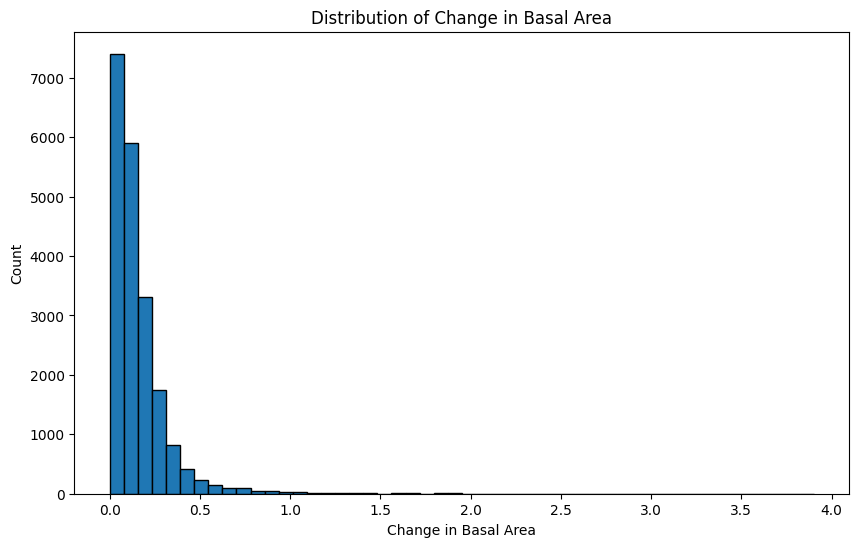

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['change_basal_area'], bins=50, edgecolor='black')
plt.title('Distribution of Change in Basal Area')
plt.xlabel('Change in Basal Area')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Change in Basal Area')

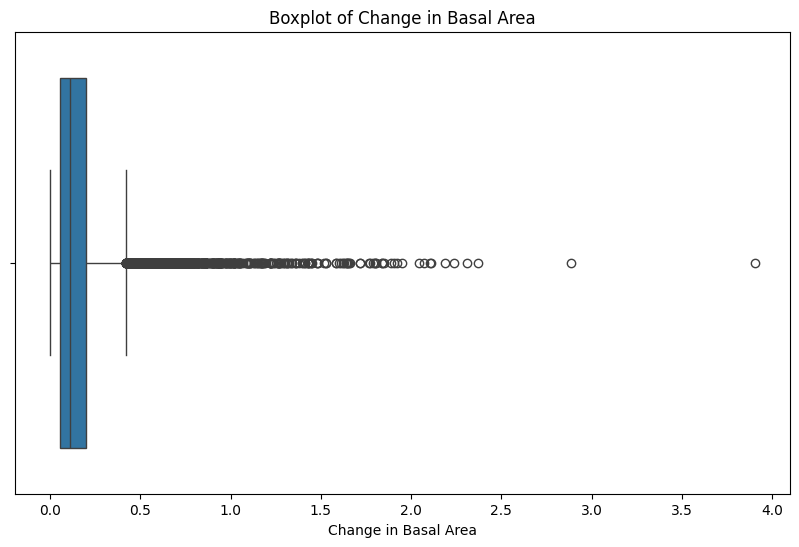

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['change_basal_area']) 

plt.title('Boxplot of Change in Basal Area')
plt.xlabel('Change in Basal Area')

In [17]:
no_growth_cutoff = 0.0 
extreme_cutoff = 10.0

# 1. Drop NaNs in target variable
df_clean = df.dropna(subset=['change_basal_area']).copy()

# 2. Filter out extreme errors
df_clean = df_clean[df_clean['change_basal_area'] <= extreme_cutoff]

# 3. Calculate Median for "Active" trees (using your 0.0 cutoff)
growing_trees = df_clean[df_clean['change_basal_area'] > no_growth_cutoff]
median_growth = growing_trees['change_basal_area'].median()

print(f"Median split point: {median_growth}")

# 4. Apply Binary Categories
def get_category(val):
    # Anything below the median of active growth (including 0) is now "Little/No Growth"
    if val <= median_growth:
        return 'Little/No Growth'
    else:
        return 'A Lot of Growth'

df_clean['growth_category'] = df_clean['change_basal_area'].apply(get_category)
print(df_clean['growth_category'].value_counts())

Median split point: 0.118690277137901
growth_category
Little/No Growth    10819
A Lot of Growth      9616
Name: count, dtype: int64


In [18]:
# use 3 bins for growth category actually (keep old code just in case)
no_growth_cutoff = 0.0

growing_trees = df[df['change_basal_area'] > no_growth_cutoff]
median_growth = growing_trees['change_basal_area'].median()

print(f"Median split point: {median_growth}")

def get_category(val):
    if val <= no_growth_cutoff:
        return 'No Growth'
    elif val <= median_growth:
        return 'A Little Growth'
    else:
        return 'A Lot of Growth'

df['growth_category'] = df['change_basal_area'].apply(get_category)

df['growth_category'] = pd.qcut(df['change_basal_area'], 3, labels=['No/Little Change', 'Moderate Change', 'Extreme Change'])

print(df['growth_category'].value_counts())

Median split point: 0.118690277137901
growth_category
No/Little Change    6813
Extreme Change      6812
Moderate Change     6810
Name: count, dtype: int64


In [21]:
df=df.dropna()

In [22]:
df.to_csv('categorized_data.csv', index=False)